# Results and Analysis

In [92]:
# import packages
import requests
import os
import json
import re
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from fuzzywuzzy import fuzz
import s3fs

Firstly, we need to import the text file containing our original list of tweets.

In [2]:
# import original tweet data
file1 = open("TwitterData.txt", "r")
textfile = file1.read()
tweets = textfile.splitlines()
while("" in tweets) :
    tweets.remove("")
while(" " in tweets) :
    tweets.remove(" ")

## Slang Percentage

We now define a method called slang, which takes our list of tweets and returns a list of the percentage of slang words in each tweet.

In [3]:
def slang(tweets):
    # List to save slang percentage of each tweet
    slangPerc = []
    # LINUX kernel English dictionary
    file = open("/usr/share/dict/words", "r")
    # list of words in English dictionary
    words = re.sub("[^\w]", " ",  file.read()).split()
    # Compares words in tweet to English dictionary to identify slang
    for i in range(len(tweets)):
        # count slang words in tweet
        count = 0
        # list of words in the tweet
        tweetWords = tweets[i].split()
        if len(tweetWords) != 0:
            # iterate through list to compare each word to English dictionary to check for slang
            for j in range(len(tweetWords)):
                word = tweetWords[j]
                if word.strip().lower() in words:
                    continue
                else:
                    count += 1
            slangPerc.append(count/len(tweetWords))
    return slangPerc

In [4]:
# store list of slang percentage of original tweets in a list called sp
sp = slang(tweets)

## Translation Data

To better analyse our results, we need to put our re-translated data back into lists of tweets.

In [5]:
fs = s3fs.S3FileSystem()

In [6]:
fileZh = fs.open('s3://qtm350twitterproject/languagetoenglish/en.zh.TwitterData.txt','rb')
textfile = fileZh.read()
translatedTweetsZh = textfile.splitlines()
for i in range(len(translatedTweetsZh)):
    translatedTweetsZh[i] = translatedTweetsZh[i].decode('UTF-8')
while("" in translatedTweetsZh) :
    translatedTweetsZh.remove("")

In [7]:
fileRu = fs.open('s3://qtm350twitterproject/languagetoenglish/en.ru.TwitterData.txt','rb')
textfile = fileRu.read()
translatedTweetsRu = textfile.splitlines()
for i in range(len(translatedTweetsRu)):
    translatedTweetsRu[i] = translatedTweetsRu[i].decode('UTF-8')
while("" in translatedTweetsRu) :
    translatedTweetsRu.remove("")

In [8]:
fileEs = fs.open('s3://qtm350twitterproject/languagetoenglish/en.es.TwitterData.txt','rb')
textfile = fileEs.read()
translatedTweetsEs = textfile.splitlines()
for i in range(len(translatedTweetsEs)):
    translatedTweetsEs[i] = translatedTweetsEs[i].decode('UTF-8')
while("" in translatedTweetsEs) :
    translatedTweetsEs.remove("")

## Match Percentage

Now we define another method, match, which uses the `fuzzywuzzy` package to calculate a match percentage between the original tweet and the re-translation, then saves the resulting score into a list.

In [9]:
def match(tweets, translatedTweets):
    # List to save match percentage of each tweet
    matchPerc = []
    # Compares words in re-translated tweet to original tweet
    for i in range(len(translatedTweets)):
        try:
            p = fuzz.token_set_ratio(translatedTweets[i],tweets[i])
        except:
            p = 0
        matchPerc.append(p)
    return matchPerc

In [10]:
mpZh = match(tweets, translatedTweetsZh)

In [11]:
mpRu = match(tweets, translatedTweetsRu)

In [12]:
mpEs = match(tweets, translatedTweetsEs)

## Dataframes

Next, we need to store the slang percentage and corresponding match percentage in data frames, for each language set.

In [64]:
# Create dataframe of slang percentage and match percentage for each tweet in Chinese
dfZh = pd.DataFrame(list(zip(sp, mpZh, tweets)), columns =['Slang_Percentage', 'Match_Percentage', 'Original_Tweet'])

In [65]:
# Create dataframe of slang percentage and match percentage for each tweet in Russian
dfRu = pd.DataFrame(list(zip(sp, mpRu, tweets)), columns =['Slang_Percentage', 'Match_Percentage', 'Original_Tweet'])

In [66]:
# Create dataframe of slang percentage and match percentage for each tweet in Spanish
dfEs = pd.DataFrame(list(zip(sp, mpEs, tweets)), columns =['Slang_Percentage', 'Match_Percentage', 'Original_Tweet'])

## Visualising our Results

Now that we have our data ready, we can start to analyse our results. Firstly, we can look at the distribution of slang percentage and the match percentages by creating histograms of the data.

Text(0.5, 1.0, 'Distribution of Match Percentage for Chinese')

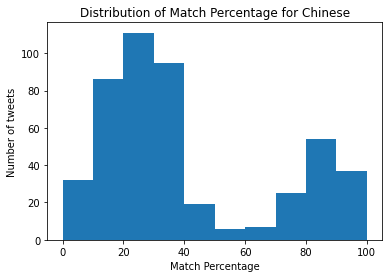

In [67]:
# Histogram to visualise distribution of match percentage data with Chinese translation
plt.hist(dfZh['Match_Percentage'])
plt.xlabel('Match Percentage')
plt.ylabel('Number of tweets')
plt.title('Distribution of Match Percentage for Chinese')

Text(0.5, 1.0, 'Distribution of Match Percentage for Russian')

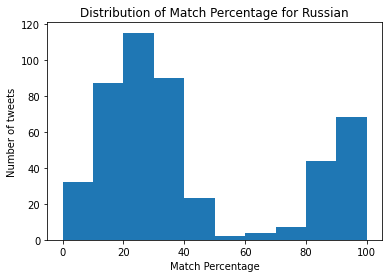

In [60]:
# Histogram to visualise distribution of match percentage data with Russian translation
plt.hist(dfRu['Match_Percentage'])
plt.xlabel('Match Percentage')
plt.ylabel('Number of tweets')
plt.title('Distribution of Match Percentage for Russian')

Text(0.5, 1.0, 'Distribution of Match Percentage for Spanish')

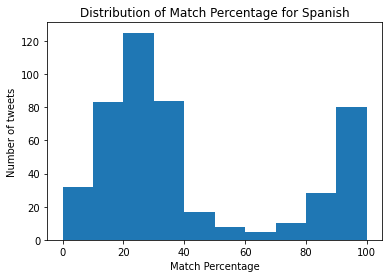

In [61]:
# Histogram to visualise distribution of match percentage data with Spanish translation
plt.hist(dfEs['Match_Percentage'])
plt.xlabel('Match Percentage')
plt.ylabel('Number of tweets')
plt.title('Distribution of Match Percentage for Spanish')

Text(0.5, 1.0, 'Distribution of Slang Percentage')

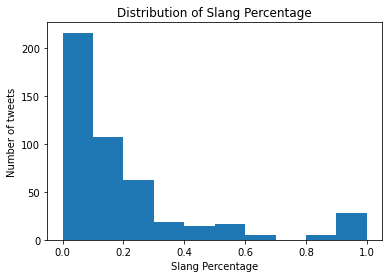

In [62]:
# Histogram to visualise distribution of slang percentage data
plt.hist(dfZh['Slang_Percentage'])
plt.xlabel('Slang Percentage')
plt.ylabel('Number of tweets')
plt.title('Distribution of Slang Percentage')

Plotting the match percentage against the slang percentage will help us to answer our hypothesis, that an increase in slang percentage will lower the match percentage. Let's do this for each language data set.

Text(0, 0.5, 'Match Percentage')

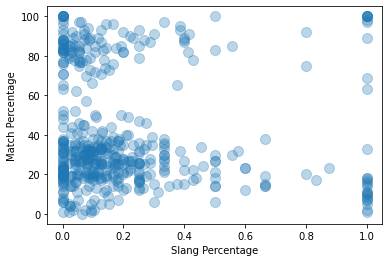

In [21]:
# Plot of match percentage against slang percentage for the Chinese data set
plt.plot(dfZh['Slang_Percentage'], dfZh['Match_Percentage'], 'o', alpha=0.3, markersize=10)
plt.xlabel('Slang Percentage')
plt.ylabel('Match Percentage')

Text(0, 0.5, 'Match Percentage')

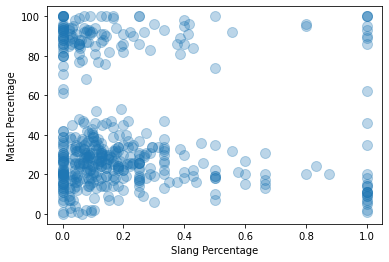

In [22]:
# Plot of match percentage against slang percentage for the Russian data set
plt.plot(dfRu['Slang_Percentage'], dfRu['Match_Percentage'], 'o', alpha=0.3, markersize=10)
plt.xlabel('Slang Percentage')
plt.ylabel('Match Percentage')

Text(0, 0.5, 'Match Percentage')

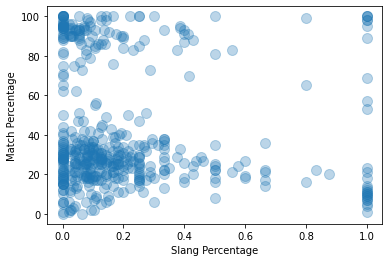

In [23]:
# Plot of match percentage against slang percentage for the Spanish data set
plt.plot(dfEs['Slang_Percentage'], dfEs['Match_Percentage'], 'o', alpha=0.3, markersize=10)
plt.xlabel('Slang Percentage')
plt.ylabel('Match Percentage')

There does not appear to be a singular linear trend between the two variables. We can look more closely at the correlation and run an OLS regression, to confirm this.

In [24]:
# Correlation between slang percentage and match percentage in our Chinese data set
dfZh.corr()

,Slang_Percentage,Match_Percentage
Slang_Percentage,1.000000,-0.052051
Match_Percentage,-0.052051,1.000000


In [25]:
# Correlation between slang percentage and match percentage in our Russian data set
dfRu.corr()

,Slang_Percentage,Match_Percentage
Slang_Percentage,1.000000,-0.066153
Match_Percentage,-0.066153,1.000000


In [26]:
# Correlation between slang percentage and match percentage in our Spanish data set
dfEs.corr()

,Slang_Percentage,Match_Percentage
Slang_Percentage,1.000000,-0.084359
Match_Percentage,-0.084359,1.000000


In [27]:
# OLS regression of match percentage on slang percentage for the Chinese data
resultsZh = smf.ols('Match_Percentage ~ Slang_Percentage', data = dfZh).fit()

In [28]:
# Results of OLS regression for Chinese data
resultsZh.params

Intercept           41.493835
Slang_Percentage    -5.861013
dtype: float64

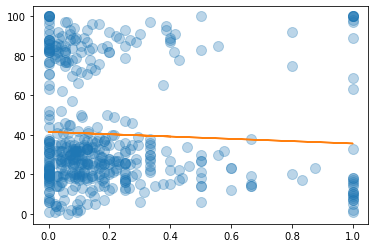

In [29]:
# Plot of data with OLS regression line imposed on top for Chinese data
plt.plot(dfZh['Slang_Percentage'], dfZh['Match_Percentage'], 'o', alpha=0.3, markersize=10)
plt.plot(dfZh['Slang_Percentage'], resultsZh.predict(dfZh['Slang_Percentage']))

In [30]:
# OLS regression of match percentage on slang percentage for the Russian data
resultsRu = smf.ols('Match_Percentage ~ Slang_Percentage', data = dfRu).fit()

In [31]:
# Results of OLS regression for Russian data
resultsRu.params

Intercept           42.804845
Slang_Percentage    -7.879558
dtype: float64

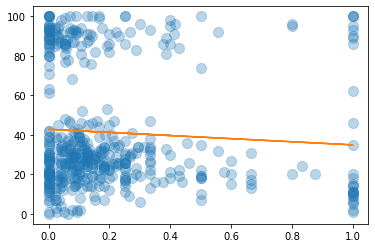

In [32]:
# Plot of data with OLS regression line imposed on top for Russian data
plt.plot(dfRu['Slang_Percentage'], dfRu['Match_Percentage'], 'o', alpha=0.3, markersize=10)
plt.plot(dfRu['Slang_Percentage'], resultsRu.predict(dfRu['Slang_Percentage']))

In [33]:
# OLS regression of match percentage on slang percentage for the Spanish data
resultsEs = smf.ols('Match_Percentage ~ Slang_Percentage', data = dfEs).fit()

In [34]:
# Results of OLS regression for Spanish data
resultsEs.params

Intercept           43.629823
Slang_Percentage   -10.149023
dtype: float64

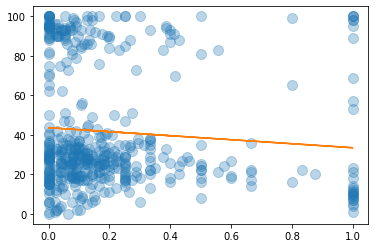

In [35]:
# Plot of data with OLS regression line imposed on top for Spanish data
plt.plot(dfEs['Slang_Percentage'], dfEs['Match_Percentage'], 'o', alpha=0.3, markersize=10)
plt.plot(dfEs['Slang_Percentage'], resultsEs.predict(dfEs['Slang_Percentage']))

## Hidden Variable

All of our data sets have a low correlation between match and slang percentage. However, looking at our results, it appears that for all of our data sets there are two clusters of data, one which appears to follow the trend we expected of a decreasing match percentage with an increase in slang percentage, and one which appears to have a high match percentage regardless of the slang percentage of the original tweet. To investgate this further, we will filter by match percentage, seperating the results for under and over 50% match.

Firstly, looking at the Chinese translation data:

Text(0.5, 1.0, 'Low Match Percentage')

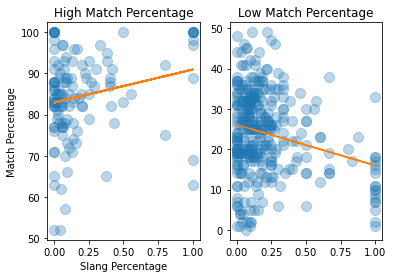

In [69]:
# Creating data frame filtered for match percentage > 50 and running OLS regression on subset
dfZhH = dfZh[dfZh['Match_Percentage'] > 50]
resultsZhH = smf.ols('Match_Percentage ~ Slang_Percentage', data = dfZhH).fit()
# Plot of data with high match scores for Chinese data
plt.subplot(1, 2, 1)
plt.plot(dfZhH['Slang_Percentage'], dfZhH['Match_Percentage'], 'o', alpha=0.3, markersize=10)
plt.plot(dfZhH['Slang_Percentage'], resultsZhH.predict(dfZhH['Slang_Percentage']))
plt.title('High Match Percentage')
plt.ylabel('Match Percentage')
plt.xlabel('Slang Percentage')

# Creating data frame filtered for match percentage < 50 and running OLS regression on subset
dfZhL = dfZh[dfZh['Match_Percentage'] < 50]
resultsZhL = smf.ols('Match_Percentage ~ Slang_Percentage', data = dfZhL).fit()
# Plot of data with low match scores for Chinese data
plt.subplot(1, 2, 2)
plt.plot(dfZhL['Slang_Percentage'], dfZhL['Match_Percentage'], 'o', alpha=0.3, markersize=10)
plt.plot(dfZhL['Slang_Percentage'], resultsZhL.predict(dfZhL['Slang_Percentage']))
plt.title('Low Match Percentage')

Looking at the above two plots, we can see that there does appear to be a clear negative correlation between slang percentage and match percentage for the tweets with lower match scores. We can repeat this process for our other two data sets, Russian and Spanish, to look for a similar pattern in the data, and therefore a potential hidden variable we may have uncovered. 

Next, the Russian data set:

Text(0.5, 1.0, 'Low Match Percentage')

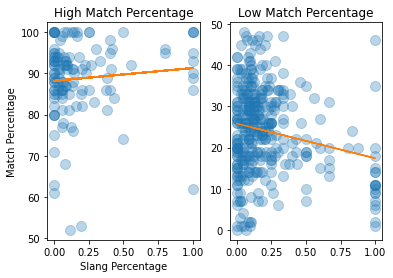

In [70]:
# Creating data frame filtered for match percentage > 50 and running OLS regression on subset
dfRuH = dfRu[dfRu['Match_Percentage'] > 50]
resultsRuH = smf.ols('Match_Percentage ~ Slang_Percentage', data = dfRuH).fit()
# Plot of data with high match scores for Chinese data
plt.subplot(1, 2, 1)
plt.plot(dfRuH['Slang_Percentage'], dfRuH['Match_Percentage'], 'o', alpha=0.3, markersize=10)
plt.plot(dfRuH['Slang_Percentage'], resultsRuH.predict(dfRuH['Slang_Percentage']))
plt.title('High Match Percentage')
plt.ylabel('Match Percentage')
plt.xlabel('Slang Percentage')

# Creating data frame filtered for match percentage < 50 and running OLS regression on subset
dfRuL = dfRu[dfRu['Match_Percentage'] < 50]
resultsRuL = smf.ols('Match_Percentage ~ Slang_Percentage', data = dfRuL).fit()
# Plot of data with low match scores for Chinese data
plt.subplot(1, 2, 2)
plt.plot(dfRuL['Slang_Percentage'], dfRuL['Match_Percentage'], 'o', alpha=0.3, markersize=10)
plt.plot(dfRuL['Slang_Percentage'], resultsRuL.predict(dfRuL['Slang_Percentage']))
plt.title('Low Match Percentage')

Again, we see the same pattern, with the low match percetage data exhibiting a negative correlation, whereas the high match tweets do not appear to depend on the slang percentage in the original tweet.

Finally, for the Spanish translation data:

Text(0.5, 1.0, 'Low Match Percentage')

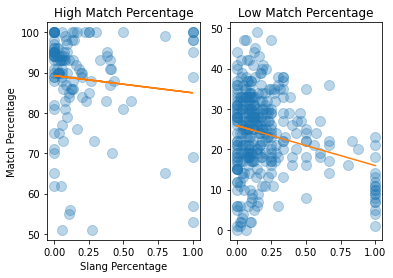

In [71]:
# Creating data frame filtered for match percentage > 50 and running OLS regression on subset
dfEsH = dfEs[dfEs['Match_Percentage'] > 50]
resultsEsH = smf.ols('Match_Percentage ~ Slang_Percentage', data = dfEsH).fit()
# Plot of data with high match scores for Chinese data
plt.subplot(1, 2, 1)
plt.plot(dfEsH['Slang_Percentage'], dfEsH['Match_Percentage'], 'o', alpha=0.3, markersize=10)
plt.plot(dfEsH['Slang_Percentage'], resultsEsH.predict(dfEsH['Slang_Percentage']))
plt.title('High Match Percentage')
plt.ylabel('Match Percentage')
plt.xlabel('Slang Percentage')

# Creating data frame filtered for match percentage < 50 and running OLS regression on subset
dfEsL = dfEs[dfEs['Match_Percentage'] < 50]
resultsEsL = smf.ols('Match_Percentage ~ Slang_Percentage', data = dfEsL).fit()
# Plot of data with low match scores for Chinese data
plt.subplot(1, 2, 2)
plt.plot(dfEsL['Slang_Percentage'], dfEsL['Match_Percentage'], 'o', alpha=0.3, markersize=10)
plt.plot(dfEsL['Slang_Percentage'], resultsEsL.predict(dfEsL['Slang_Percentage']))
plt.title('Low Match Percentage')

Having examined all of our data sets, we can see that there does appear to be two seperate trends, with the high match percentage tweets not depending on slang percentage in the original tweet, whilst the for the low match percentage tweets there is a negative correlation between match percentage and slang percentage, as we predicted.

Let's look at some of the tweets in our high and low match subsets, to see if we can identify a possible hidden variable which could be causing this pattern.

In [87]:
dfZhH.sample(10)['Original_Tweet']

4      RT TimHortons Tims x Justin Bieber Coming Soon...
15     BillyM2k Normal money is actually a bunch of a...
109    RT CCDHate New washingtonpost article reveals ...
102                                 Spotify VivaLatino  
134    RT HouseOfGucciMov This Thanksgiving escape yo...
91                                heybrain_ I feel that 
72     WNBA champion Candace_Parker is a leader on an...
110    This is the cold machinery of the Death Penalt...
108    This game would have been way more fun if it w...
105    Check out the cozy new holiday collection in m...
Name: Original_Tweet, dtype: object

In [86]:
dfZhL.sample(10)['Original_Tweet']

254        fearlessxotb wallshours Totally is a top tune
178    RT ChristelJlover This is so nice I really can...
164    Starting today Gap is donating 1 per Spotify s...
338    MY NIGHTMARE ON ELM STREET COLLECTION NOW LIVE...
132                     ScarletEnvyNYC I love you legend
332                                      kyliecosmetics 
446    Respect to a Proper gun fight Congrats on gett...
177    Last chance to shop the Sephora holiday event ...
319    From A Wonder Concert amp Conversation Watch n...
268    My message to the American people is this Amer...
Name: Original_Tweet, dtype: object

Looking at the above sample of tweets from the high and low match subsets, there does not seem to be a clear difference between the tweets. Perhaps we can look at tweet length, to see if this is similar between the subsets?  

In [90]:
length = pd.DataFrame([[]])
length['Chinese High'] = dfZhH['Original_Tweet'].apply(len).mean()
length['Chinese Low'] = dfZhL['Original_Tweet'].apply(len).mean()
length['Russian High'] = dfRuH['Original_Tweet'].apply(len).mean()
length['Russian Low'] = dfRuL['Original_Tweet'].apply(len).mean()
length['Spanish High'] = dfEsH['Original_Tweet'].apply(len).mean()
length['Spanish Low'] = dfEsL['Original_Tweet'].apply(len).mean()

In [91]:
length

,Chinese High,Chinese Low,Russian High,Russian Low,Spanish High,Spanish Low
0,114.261905,104.367347,113.136,104.766571,112.79845,105.105572


We can see that for all of the data sets, the high match percentage tweets are on average longer than the low match percentage tweets. Therefore this is a possible candidate for our hidden variable, affecting the accuracy of the ML Translate service.